## Algorithm Evaluation
Find the best model for given data

In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

## Add root directory in path

In [3]:
import os
import sys

sys.path.append(os.path.abspath(".."))

In [9]:
from utils import preprocess_data

## Step 1 :- Data Ingestion

In [4]:
import pandas as pd

df = pd.read_csv("train_loan.csv")
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


## Loan status is target
0 - Loan Rejected
1 - Loan Approved

In [5]:
df["loan_status"].unique()

array([0, 1])

In [7]:
a = df["loan_status"].value_counts()
a

loan_status
0    50295
1     8350
Name: count, dtype: int64

<Axes: xlabel='loan_status'>

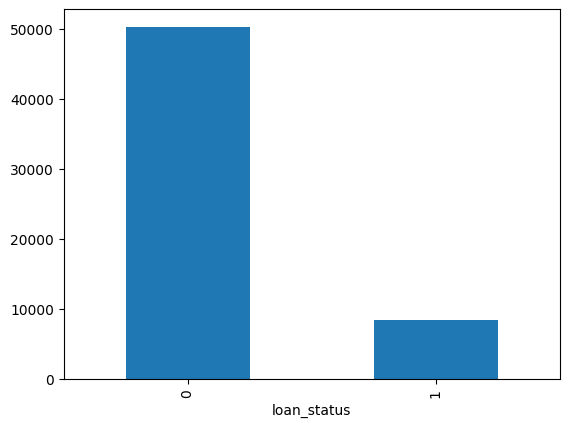

In [8]:
a.plot(kind="bar")

## Step 2 :- Perform Basic Data Quality

In [10]:
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

### Step 3 :- Separate X & Y(Loan Status) 

In [13]:
X = df.drop(columns=["id", "loan_status"])
Y = df["loan_status"]

In [14]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [16]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [17]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

### Step 4 :- Apply Preprocessing On X

In [18]:
from utils import preprocess_data

In [19]:
X_pre, pre = preprocess_data(X)

In [20]:
X_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

## Step 5 :- Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, test_size=0.2, random_state=42
)

In [23]:
xtrain.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
14337,1.400450,-0.370311,-1.187200,-0.362625,1.045295,-0.209808,2.279989,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17117,-0.091305,-0.549585,-0.429576,-0.758041,0.323635,-0.427932,0.790845,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
32590,-0.422806,0.156966,-1.187200,-0.218837,-0.921970,-0.536994,-0.698298,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55811,1.897701,0.288785,-0.682117,1.039305,-1.363533,0.444564,1.287227,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40120,-0.920057,-0.486311,0.075506,-0.937775,-0.994465,-0.755118,-0.946489,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
ytrain.head()

14337    0
17117    0
32590    0
55811    0
40120    0
Name: loan_status, dtype: int64

In [28]:
xtest.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
4657,-0.754307,-0.633949,-1.187200,-0.991696,-0.882427,-0.755118,-0.450108,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56440,-0.422806,-0.106673,1.085671,-0.758041,-0.688007,-0.864180,-0.450108,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42117,0.737448,0.059419,-1.187200,1.937978,0.610322,1.098935,0.046274,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10849,-0.920057,-0.897587,-1.187200,-0.758041,-0.028957,0.117378,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39395,-0.091305,-0.106673,-0.934659,-0.398572,0.504874,-0.427932,1.039036,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
ytest.head()

4657     0
56440    0
42117    1
10849    0
39395    0
Name: loan_status, dtype: int64

In [32]:
xtrain.shape

(46916, 22)

In [33]:
xtest.shape

(11729, 22)

## Step 6 :- Select best model for given data

In [34]:
!uv add xgboost

Resolved 55 packages in 6ms
Audited 48 packages in 0.11ms


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
import xgboost as xgb

In [36]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    HistGradientBoostingClassifier(),
    xgb.XGBRFClassifier(),
]

In [37]:
from utils import algorithm_evaluation

In [38]:
best_model, res_df = algorithm_evaluation(models, xtrain, ytrain, xtest, ytest)

{'model_name': 'LogisticRegression', 'model': LogisticRegression(), 'f1_train': 0.7932, 'f1_test': 0.7866, 'f1_cv': np.float64(0.7928)}


{'model_name': 'DecisionTreeClassifier', 'model': DecisionTreeClassifier(), 'f1_train': 1.0, 'f1_test': 0.82, 'f1_cv': np.float64(0.8262)}


{'model_name': 'RandomForestClassifier', 'model': RandomForestClassifier(), 'f1_train': 0.9999, 'f1_test': 0.8897, 'f1_cv': np.float64(0.8853)}


{'model_name': 'HistGradientBoostingClassifier', 'model': HistGradientBoostingClassifier(), 'f1_train': 0.9019, 'f1_test': 0.8909, 'f1_cv': np.float64(0.891)}


{'model_name': 'XGBRFClassifier', 'model': XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, feature_weights=None,
                gamma=None, grow_policy=None, importance_type=None,
                in

In [39]:
best_model

HistGradientBoostingClassifier()

In [40]:
res_df

,model_name,model,f1_train,f1_test,f1_cv
0,HistGradientBoostingClassifier,HistGradientBoostingClassifier(),0.9019,0.8909,0.8910
1,RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",0.9999,0.8897,0.8853
2,XGBRFClassifier,"XGBRFClassifier(base_score=None, booster=None,...",0.8775,0.8711,0.8731
3,DecisionTreeClassifier,DecisionTreeClassifier(),1.0000,0.8200,0.8262
4,LogisticRegression,LogisticRegression(),0.7932,0.7866,0.7928


## Step 7 :- Evaluate Best Model in Detailes

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_model, xtest, ytest)

In [ ]:

ypred_test = best_model.predict(xtest)

In [ ]:

ypred_test[0:5]

In [ ]:

ytest.head()

In [ ]:

from sklearn.metrics import classification_report

In [ ]:

print(classification_report(ytest, ypred_test))

## Step 8 :- Out Of Sample Prediction

In [41]:
xnew = pd.read_csv("test_loan.csv")
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [42]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [43]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
0,-0.754307,0.130602,-0.429576,2.836651,1.674687,2.189555,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.257055,0.842425,0.328047,0.140632,0.659750,-0.646056,-0.450108,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.257055,-0.897587,0.075506,-0.937775,2.145908,-0.318870,-0.946489,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.903198,-0.370311,-0.177035,-0.398572,-0.585854,-0.209808,0.294464,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.257055,1.000608,0.833130,1.039305,1.859221,-0.100746,-0.450108,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [44]:
preds = best_model.predict(xnew_pre)
preds[0:5]

array([1, 0, 1, 0, 0])

In [45]:
best_model.classes_

array([0, 1])

In [46]:
probs = best_model.predict_proba(xnew_pre)[:, 1]
probs

array([0.99380618, 0.01809577, 0.69526404, ..., 0.01386623, 0.30741088,
       0.95421136], shape=(39098,))

In [47]:
res = xnew[["id"]]
res["loan_status"] = preds
res["aproval_prob"] = probs.round(4)

In [48]:
res

,id,loan_status,aproval_prob
0,58645,1,0.9938
1,58646,0,0.0181
2,58647,1,0.6953
3,58648,0,0.0130
4,58649,0,0.0636
...,...,...,...
39093,97738,0,0.0558
39094,97739,0,0.0075
39095,97740,0,0.0139
39096,97741,0,0.3074


In [49]:
b = res["loan_status"].value_counts()
b

loan_status
0    34888
1     4210
Name: count, dtype: int64

In [51]:
b = res["loan_status"].value_counts()
b

loan_status
0    34888
1     4210
Name: count, dtype: int64

<Axes: xlabel='loan_status'>

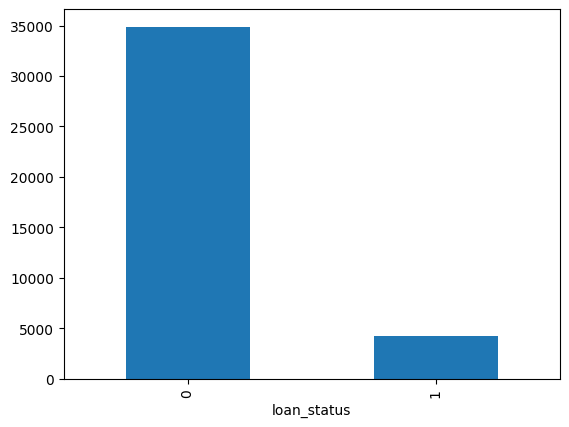

In [52]:
b.plot(kind="bar")

In [53]:
res.to_csv("loan_results.csv", index=False)

## Step 9 :- Save the Model and Preprocessor

In [54]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [55]:
best_model

HistGradientBoostingClassifier()

In [56]:
import joblib

joblib.dump(pre, "pre.joblib")

['pre.joblib']

In [57]:
joblib.dump(best_model, "loan_model.joblib")

['loan_model.joblib']

## Load Objects

In [58]:
p = joblib.load("pre.joblib")
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [59]:
m = joblib.load("loan_model.joblib")
m

HistGradientBoostingClassifier()

In [60]:
m.score(xtest, ytest)

0.9519140591695797